<h1>
<p style="text-align: center;"> Qual è il futuro del lavoro? </p></h1>

#### DEVELOPER TEAM:
 -    Guanetti Alice
 -    Macchi Daniele

<img src="img_1.png" height= "1000" width="2000">

![](img_2.png)

<p style="text-align: center;">
<a href="https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-attivati/qbau-cyuc"> Lavori Attivati,</a>
<a href="https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm"> Lavori Cessati</a>
</p>


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import sklearn
import statsmodels.api as sm
import warnings

from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from pylab import rcParams
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math

%matplotlib inline

plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

In [3]:
df_rapporti_attivati = pd.read_csv("Rapporti_di_lavoro_attivati.csv")
df_rapporti_cessati = pd.read_csv("Rapporti_di_lavoro_cessati.csv")

<h1>
<p style="text-align: center;"> ANALISI ESPLORATIVA </p></h1>

#### L'analisi esplorativa dei dati è stata utilizzata per fornire una migliore comprensione delle variabili del dataset e delle loro interrelazioni adottando dei metodi di visualizzazione dei dati.

<center>
<img src="img_3.png" height= "500" width="500" align="middle">
</center>

M    5108146
F    4471648
Name: GENERE, dtype: int64

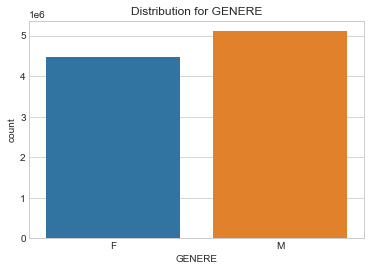

In [4]:
'''LAVORI ATTIVATI'''
sns.countplot(x='GENERE', data=df_rapporti_attivati)
plt.title('Distribution for GENERE')

df_rapporti_attivati['GENERE'].value_counts()

M    2117550
F    1623844
Name: GENERE, dtype: int64

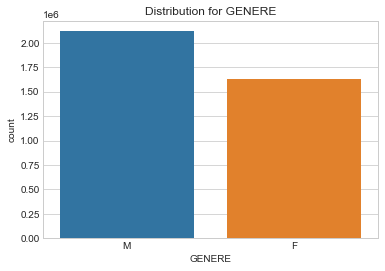

In [6]:
'''LAVORI CESSATI'''
sns.countplot(x='GENERE', data=df_rapporti_cessati)
plt.title('Distribution for GENERE')

df_rapporti_cessati['GENERE'].value_counts()

In [7]:
## Anomalie età
df_rapporti_attivati.sort_values(by=['ETA'])

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
5823722,10/06/2017,M,0,"Commercio all'ingrosso di elettrodomestici, di...",DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
6532181,08/05/2015,M,0,"Fabbricazione di pitture, vernici e smalti, in...",NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3838493,10/08/2018,M,0,Altre attività di servizi per la persona nca,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,PAKISTAN
6462705,01/07/2010,F,0,Alberghi,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,SUDAN
6803357,11/06/2019,F,0,Assicurazioni sulla vita,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,COMO,ITALIA
...,...,...,...,...,...,...,...,...,...
8784346,03/02/2011,M,99,Altre attività di pulizia nca,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,EGITTO
4176633,07/01/2011,M,100,Servizi di vigilanza privata,NESSUN TITOLO DI STUDIO,LAVORO INTERMITTENTE A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIA
4817178,05/03/2011,M,100,Riparazione di carrozzerie di autoveicoli,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,PAVIA,ITALIA
4512593,07/09/2009,M,101,Trattamento e rivestimento dei metalli,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,MILANO,SENEGAL


In [8]:
## Anomalie età
df_rapporti_cessati.sort_values(by=['ETA'])

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
1429130,08/02/2021,M,0,Altre attività di lavori specializzati di cost...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIA
1418101,05/09/2011,M,0,Ristorazione con somministrazione,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,"RUSSA, Federazione"
3375794,10/04/2021,M,0,Ospedali e case di cura specialistici,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
165760,02/02/2016,M,0,Altre attività connesse ai trasporti terrestri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
1069168,06/10/2015,M,0,Imballaggio e confezionamento di generi alimen...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,MAROCCO
...,...,...,...,...,...,...,...,...,...
3374432,05/03/2010,M,110,Edizione di altri software a pacchetto (esclus...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
1657709,10/07/2010,F,110,Altra stampa,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
2730033,07/05/2010,F,110,Altre strutture di assistenza sociale residenz...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIA
1260482,08/04/2010,M,110,Attività degli studi di ingegneria,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA


In [9]:
# dati nulli rapporti attivati
df_rapporti_attivati.isnull().sum()

DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
ITALIANO                          0
dtype: int64

In [10]:
# dati nulli rapporti cessati
df_rapporti_cessati.isnull().sum()

DATA                            0
GENERE                          0
ETA                             0
SETTOREECONOMICODETTAGLIO    1019
TITOLOSTUDIO                  440
CONTRATTO                       0
MODALITALAVORO                  0
PROVINCIAIMPRESA                0
ITALIANO                        0
dtype: int64

<h1>
<p style="text-align: center;"> PULIZIA DEI DATI </p></h1>

La pulizia dei dati è stata utilizzata per rimuovere dal dataset variabili inconsistenti ed errate

<center>
<img src="img_4.png" height= "500" width="500" align="middle">
</center>

In [11]:
dropAge = df_rapporti_attivati[(df_rapporti_attivati['ETA'] >= 70) | (df_rapporti_attivati['ETA'] <= 17)].index
dropAgeC = df_rapporti_cessati[(df_rapporti_cessati['ETA'] >= 70) | (df_rapporti_cessati['ETA'] <= 17)].index

df_rapporti_attivati.drop(dropAge, inplace=True)
df_rapporti_cessati.drop(dropAgeC, inplace=True)

In [12]:
# Eliminazione anomalie età
df_rapporti_attivati.sort_values(by=['ETA'])

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
574106,02/10/2010,F,18,Attività delle lavanderie industriali,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BRESCIA,ROMANIA
9019587,10/10/2019,M,18,Realizzazione di coperture,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,TIROCINIO,TEMPO PIENO,COMO,ITALIA
4810597,08/07/2009,F,18,Attività dei call center,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
4810587,01/12/2012,F,18,Attività dei call center,NESSUN TITOLO DI STUDIO,LAVORO A PROGETTO / COLLABORAZIONE COORDINATA ...,NON DEFINITO,MILANO,ITALIA
8420788,09/08/2011,F,18,Ristorazione con somministrazione,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
...,...,...,...,...,...,...,...,...,...
7591286,01/07/2011,F,69,"Fabbricazione di lastre, fogli, tubi e profila...",TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A PROGETTO / COLLABORAZIONE COORDINATA ...,NON DEFINITO,MILANO,ITALIA
9416762,10/02/2017,M,69,Trattamento e rivestimento dei metalli,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,ITALIA
3779524,09/04/2009,F,69,Istruzione primaria: scuole elementari,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A PROGETTO / COLLABORAZIONE COORDINATA ...,NON DEFINITO,MILANO,ITALIA
3783870,02/07/2014,F,69,Ricerche di mercato e sondaggi di opinione,NESSUN TITOLO DI STUDIO,LAVORO A PROGETTO / COLLABORAZIONE COORDINATA ...,NON DEFINITO,MILANO,ITALIA


In [13]:
## Eliminazione anomalie età
df_rapporti_cessati.sort_values(by=['ETA'])

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
3476311,04/09/2013,F,18,Altri lavori di completamento e di finitura de...,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,CREMONA,ROMANIA
577033,06/07/2019,M,18,Alberghi,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ROMANIA
577000,12/12/2018,M,18,Ristorazione con somministrazione,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,MILANO,BANGLADESH
1602639,08/07/2009,M,18,"Fabbricazione di stampi, portastampi, sagome, ...",LICENZA MEDIA,APPRENDISTATO EX ART.16 L. 196/97,TEMPO PIENO,BERGAMO,ITALIA
1602667,12/11/2019,M,18,Fabbricazione di altri prodotti in gomma nca,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,"MACEDONIA, ex REP. JUGOSLAVIA"
...,...,...,...,...,...,...,...,...,...
2323258,10/11/2018,M,69,Riparazione e manutenzione di altre macchine d...,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,COMO,ITALIA
2006698,05/04/2015,M,69,Attività non specializzate di lavori edili (mu...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
3038664,07/02/2014,M,69,Pulizia generale (non specializzata) di edifici,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,MAROCCO
2989905,05/03/2010,M,69,Altri servizi di supporto alle imprese nca,NESSUN TITOLO DI STUDIO,LAVORO A PROGETTO / COLLABORAZIONE COORDINATA ...,TEMPO PIENO,MILANO,ITALIA


In [14]:
col = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in col:
    df_rapporti_attivati.loc[df_rapporti_attivati[column] == '?', column] = np.nan
    df_rapporti_cessati.loc[df_rapporti_cessati[column] == '?', column] = np.nan

df_rapporti_attivati.dropna(axis = 0, inplace = True) 
df_rapporti_cessati.dropna(axis = 0, inplace = True) 

In [15]:
# Eliminazione dati nulli
df_rapporti_attivati.isnull().sum()

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
ITALIANO                     0
dtype: int64

In [16]:
# Eliminazione dati nulli
df_rapporti_cessati.isnull().sum()

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
ITALIANO                     0
dtype: int64

In [17]:
data=df_rapporti_attivati['DATA']

year=[]
mounth=[]
day=[]
data_Complete=[]
for i in data:
    data1=datetime.strptime(i, "%d/%m/%Y")
    year.append(data1.year)
    mounth.append(data1.month)
    day.append(data1.day)
    data_Complete.append(data1)

df_rapporti_attivati.drop(['DATA'], axis=1, inplace=True)

df_rapporti_attivati['DATA'] = data_Complete
df_rapporti_attivati['YEAR'] = year
df_rapporti_attivati['MOUNTH'] = mounth
df_rapporti_attivati['DAY'] = day

In [18]:
dataC=df_rapporti_cessati['DATA']

yearC=[]
monthC=[]
dayC=[]
data_CompleteC=[]
for i in dataC:
    data1C=datetime.strptime(i, "%d/%m/%Y")
    yearC.append(data1C.year)
    monthC.append(data1C.month)
    dayC.append(data1C.day)
    data_CompleteC.append(data1C)

df_rapporti_cessati.drop(['DATA'], axis=1, inplace=True)

df_rapporti_cessati['DATA'] = data_CompleteC
df_rapporti_cessati['YEAR'] = yearC
df_rapporti_cessati['MONTH'] = monthC
df_rapporti_cessati['DAY'] = dayC

<h1>
<p style="text-align: center;"> ANALISI TIME SERIES </p></h1>

Le time series sono state analizzate al fine di comprendere meglio il loro comportamento in particolare in termini di "trend", "seasonality", "residual" e "stationarity".

<center>
<img src="img_5.png" height= "500" width="500" align="middle">
</center>

In [19]:
df_rapporti_attivati = df_rapporti_attivati[(df_rapporti_attivati['YEAR'] >= 2009)]
df_rapporti_attivati = df_rapporti_attivati.groupby(['DATA']).YEAR.count()
df_1 = pd.DataFrame({'date': df_rapporti_attivati.index,
                     'value': df_rapporti_attivati.values})
df_1 = df_1.groupby(pd.Grouper(key='date', axis=0, freq='M', sort=True)).sum()
df_1.drop(df_1.loc[df_1['value']== 0].index, inplace=True)

In [20]:
df_rapporti_cessati = df_rapporti_cessati[(df_rapporti_cessati['YEAR'] >= 2009)]
df_rapporti_cessati = df_rapporti_cessati.groupby(['DATA']).YEAR.count()
df_2 = pd.DataFrame({'date': df_rapporti_cessati.index,
                     'value': df_rapporti_cessati.values})
df_2 = df_2.groupby(pd.Grouper(key='date', axis=0, freq='M', sort=True)).sum()
df_2.drop(df_2.loc[df_2['value']== 0].index, inplace=True)

In [21]:
# set di dati attivati
df_1.head(8)

,value
date,
2009-01-31,26604
2009-02-28,33627
2009-03-31,31209
2009-04-30,29069
2009-05-31,19803
2009-06-30,23648
2009-07-31,27010
2009-08-31,25829


In [22]:
# set di dati cessati
df_2.head(8)

,value
date,
2009-01-31,26529
2009-02-28,24994
2009-03-31,20847
2009-04-30,15387
2009-05-31,10607
2009-06-30,10020
2009-07-31,10440
2009-08-31,9013


<p style="text-align: center;"> Test stazionarità  </p>

In [23]:
#Stazionarità rapporti attivati
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_1)

(0.2804061683269368, True)

In [24]:
#stazionarità rapporti cessati
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_2)

(0.01, False)

<h1>
<p style="text-align: center;">  PREDIZIONE TIME SERIES </p></h1>

Tramite il modello "auto-arima" è stato possibile eseguire una predizione di valori futuri per i rapporti cessati e attivati

<center>
<img src="img_6.png" height= "500" width="700" align="middle">
</center>

In [25]:
stepwise_model_1 = auto_arima(df_1, start_p=2, d=0,start_q=2,
                           max_p=5, max_d=2, max_q=5, m=1,
                           trace=True, stationary=True,
                           error_action='warn',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_1.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3348.402, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3429.179, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3355.980, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3376.717, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3875.986, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3355.596, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3354.559, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3339.325, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3337.944, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3336.517, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3355.543, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3333.428, Time=0.18 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3335.852, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3332.220, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept

In [26]:
stepwise_model_2 = auto_arima(df_2, start_p=2, d=1,start_q=2,
                           max_p=5, max_d=2, max_q=5, m=12,
                           start_P=1, start_Q=1, max_P=5,
                           max_D=5, max_Q=5, seasonal=True,
                           trace=True, stationary=False,
                           error_action='warn',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_2.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3167.785, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3232.120, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3195.024, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3198.864, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3230.133, Time=0.46 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3190.256, Time=0.62 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3177.524, Time=0.60 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3168.911, Time=3.18 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3170.341, Time=3.09 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3193.775, Time=0.73 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3191.231, Time=1.33 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3173.866, Time=1.03 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=3157.738, Time=3.60 sec
 ARIMA(2,1,2)(3,0,2)[12] intercept   : AIC=3172.497, Time=4.98 sec
 ARIMA(2,1,2)(2,0,3

<p style="text-align: center;"> Data Training </p>

 Parametri auto-arima lavori_Attivati:
 - __start_p__ = 2   
 - __d__ = 0
 - __start_q__ = 2
 - __max_p__ = 5
 - __max_d__ = 2
 - __max_q__ = 5
 - __stationarity__ = true

Parametri auto-arima lavori_Cessati:
 - __start_p__ = 2, __start_P__ = 1
 - __d__ = 1, __m__=12
 - __start_q__ = 2, __start_Q__ = 1
 - __max_p__ = 5, __max_P__ = 5 
 - __max_d__ = 2, __max_D__ = 5
 - __max_q__ = 5, __max_Q__ = 5
 - __seasonal__= true

<p style="text-align: center;"> Summary model Auto-arima </p>

In [27]:
stepwise_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -1659.110
Date:                Sat, 18 Jun 2022   AIC                           3332.220
Time:                        15:39:49   BIC                           3353.569
Sample:                             0   HQIC                          3340.891
                                - 156                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.329e+04   5861.386      2.267      0.023    1799.922    2.48e+04
ar.L1         -0.0204      0.291     -0.070      0.944      -0.591       0.550
ar.L2          0.1822      0.167      1.091      0.275      -0.145       0.510
ar.L3          0.2421      0.073      3.318      0.001       0.099       0.385
ar.L4          0.3587      0.110      3.251      0.001       0.142       0.575
ma.L1          0.4792      0.307      1.559      0.119      -0.123       1.082
sigma2      9.865e+07      0.274   3.61e+08      0.000    9.87e+07    9.87e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.82   Prob(JB):                         0.23
Heteroskedasticity (H):               1.58   Skew:                             0.15
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+24. Standard errors may be unstable.
"""

In [28]:
stepwise_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  156
Model:             SARIMAX(0, 1, 5)x(3, 0, [1], 12)   Log Likelihood               -1552.240
Date:                              Sat, 18 Jun 2022   AIC                           3126.479
Time:                                      15:39:51   BIC                           3159.957
Sample:                                           0   HQIC                          3140.077
                                              - 156                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    170.2474    234.359      0.726      0.468    -289.087     629.582
ma.L1         -0.6209      0.104     -5.982      0.000      -0.824      -0.417
ma.L2         -0.0795      0.129     -0.618      0.537      -0.332       0.173
ma.L3          0.0350      0.149      0.235      0.814      -0.257       0.327
ma.L4          0.1093      0.144      0.758      0.448      -0.173       0.392
ma.L5         -0.2078      0.119     -1.745      0.081      -0.441       0.026
ar.S.L12      -0.1449      0.244     -0.593      0.553      -0.624       0.334
ar.S.L24       0.3744      0.158      2.376      0.018       0.066       0.683
ar.S.L36       0.4504      0.095      4.718      0.000       0.263       0.638
ma.S.L12       0.6621      0.258      2.564      0.010       0.156       1.168
sigma2      3.538e+07      0.002   1.87e+10      0.000    3.54e+07    3.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):               143.86
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             1.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.95e+25. Standard errors may be unstable.
"""

<p style="text-align: center;"> Diagnostica Modello </p>

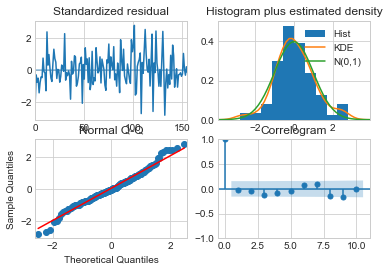

In [29]:
stepwise_model_1.plot_diagnostics()
plt.show()

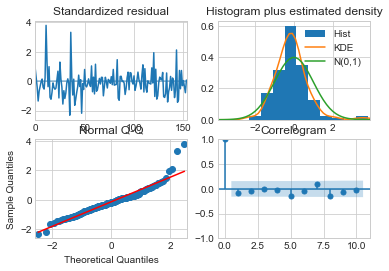

In [30]:
stepwise_model_2.plot_diagnostics()
plt.show()

In [31]:
train_size_A = 0.8
split_idx_A = round(len(df_1)* train_size_A)
split_idx_A

# Split
train_A = df_1.iloc[:split_idx_A]
test_A = df_1.iloc[split_idx_A:]

In [32]:
stepwise_model_1.fit(train_A)

ARIMA(order=(4, 0, 1), scoring_args={}, suppress_warnings=True)

In [33]:
future_forecast_A, cf = stepwise_model_1.predict(n_periods=31, return_conf_int=True)

In [34]:
future_forecast_A = pd.DataFrame(future_forecast_A,index = test_A.index,columns=['Prediction'])

In [35]:
train_size_C = 0.8
split_idx_C = round(len(df_2)* train_size_C)
split_idx_C

# Split
train_C = df_2.iloc[:split_idx_C]
test_C = df_2.iloc[split_idx_C:]

In [36]:
stepwise_model_2.fit(train_C)

ARIMA(order=(0, 1, 5), scoring_args={}, seasonal_order=(3, 0, 1, 12),
      suppress_warnings=True)

In [37]:
future_forecast_C, cf = stepwise_model_2.predict(n_periods=31, return_conf_int=True)

In [38]:
future_forecast_C = pd.DataFrame(future_forecast_C, index = test_C.index,columns=['Prediction'])

In [39]:
index_of_fc_A = pd.date_range(df_1.index[-1], periods = 31, freq='MS')

future_forecast_1 = future_forecast_A
future_forecast_1 = future_forecast_1.set_index(index_of_fc_A)

In [40]:
index_of_fc_C = pd.date_range(df_2.index[-1], periods = 31, freq='MS')
future_forecast_2 = future_forecast_C
future_forecast_2 = future_forecast_2.set_index(index_of_fc_C)

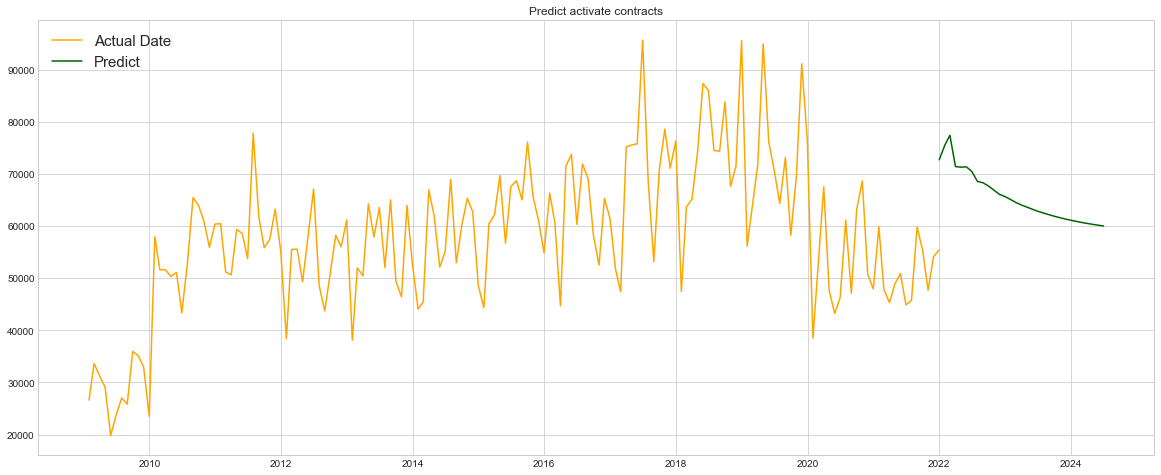

In [41]:
plt.figure(figsize=(20, 8))
plt.plot(df_1, color='orange', label='Actual Date')
plt.plot(future_forecast_1, color='darkgreen', label='Predict')
plt.legend(loc='upper left', fontsize=15)
plt.title("Predict activate contracts")
plt.show()

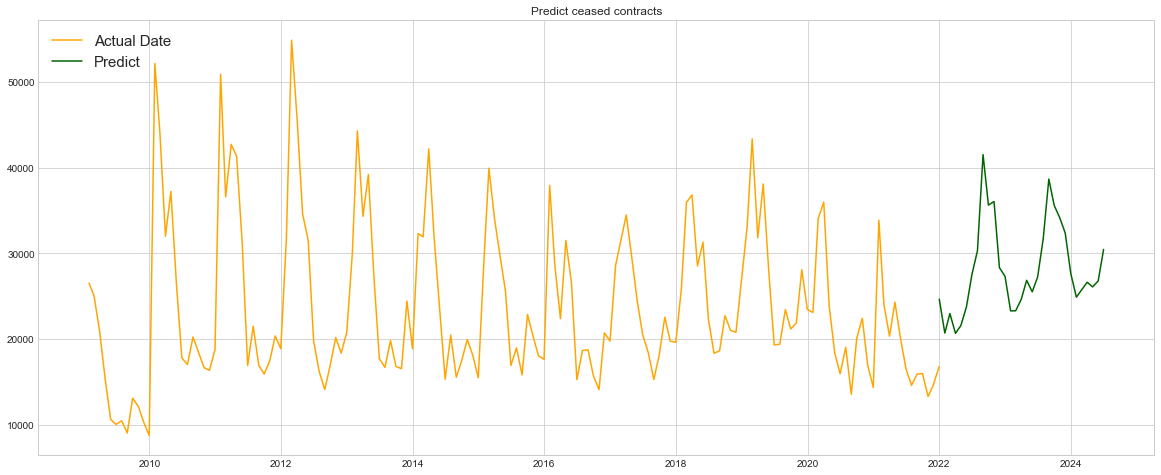

In [42]:
plt.figure(figsize=(20, 8))
plt.plot(df_2, color='orange', label='Actual Date')
plt.plot(future_forecast_2, color='darkgreen', label='Predict')
plt.legend(loc='upper left', fontsize=15)
plt.title("Predict ceased contracts")
plt.show()

<center>
<img src="img_7.png" height= "1000" width="1200" align="middle">
</center>